In [ ]:
%load_ext autoreload
%autoreload 2

# Matrix and tensor

> Matrix and tensor


- skip_showdoc: true
- skip_exec: true

In [ ]:
#| default_exp matrix

## Initial Checks

In [ ]:
#| hide
!conda list | grep "pytorch"

ffmpeg                    4.3                  hf484d3e_0    pytorch
libjpeg-turbo             2.0.0                h9bf148f_0    pytorch
pytorch                   2.0.1           py3.11_cuda11.8_cudnn8.7.0_0    pytorch
pytorch-cuda              11.8                 h7e8668a_5    pytorch
pytorch-ignite            0.4.12                   pypi_0    pypi
pytorch-lightning         2.0.7                    pypi_0    pypi
pytorch-mutex             1.0                        cuda    pytorch
torchaudio                2.0.2               py311_cu118    pytorch
torchtriton               2.0.0                     py311    pytorch
torchvision               0.15.2              py311_cu118    pytorch


In [ ]:
#| hide
!pip list | grep "fastai" 
!pip list | grep "fastbook"
!pip list | grep "ipywidgets"

fastai                        2.7.12
fastbook                      0.0.28
ipywidgets                    8.0.4


In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

## Matrix multiplication from foundations

In [ ]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

## Get data

In [ ]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('Data')
path_data.mkdir(exist_ok = True)
path_gz = path_data/'mnist.pkl.gz'

In [ ]:
path_gz

PosixPath('Data/mnist.pkl.gz')

In [ ]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [ ]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding = 'latin-1')

In [ ]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [ ]:
def chunks(x, sz):
    for i in range(0, len(x), sz):
        yield x[i:i+sz]

In [ ]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

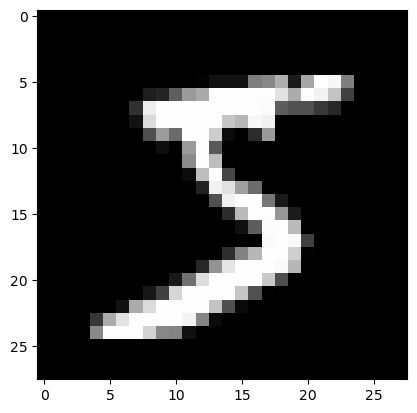

In [ ]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

In [ ]:
from itertools import islice

In [ ]:
it = iter(vals)
islice(it, 5)

<itertools.islice>

In [ ]:
next(it)

0.0

In [ ]:
isit = islice(it,5)

In [ ]:
next(isit)

0.0

In [ ]:
list(islice(it, 5))

[0.0, 0.19140625, 0.9296875, 0.98828125, 0.98828125]

In [ ]:
it= iter(lst1)
img = list(iter(lambda: list(islice(it,28)), []))

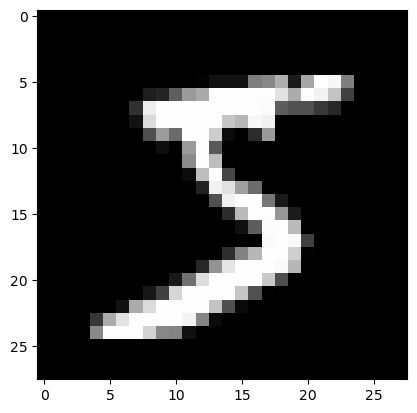

In [ ]:
plt.imshow(img);

## Matrix and tensor

In [ ]:
img[20][15]

0.98828125

In [ ]:
class Matrix:
    def __init__(self, xs): 
        self.xs = xs
        
    def __getitem__(self, idxs): 
        return self.xs[idxs[0]][idxs[1]]

In [ ]:
m = Matrix(img)
m[20, 15]

0.98828125

In [ ]:
import torch
from torch import tensor

In [ ]:
tensor([1,2,3])

tensor([1, 2, 3])

In [ ]:
tens = tensor(img)
tens[20,15]

tensor(0.9883)

In [ ]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
x_train.shape

torch.Size([50000, 784])

In [ ]:
x_valid.shape

torch.Size([10000, 784])

In [ ]:
x_train.type()

'torch.FloatTensor'

In [ ]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([50000, 28, 28])

<matplotlib.image.AxesImage>

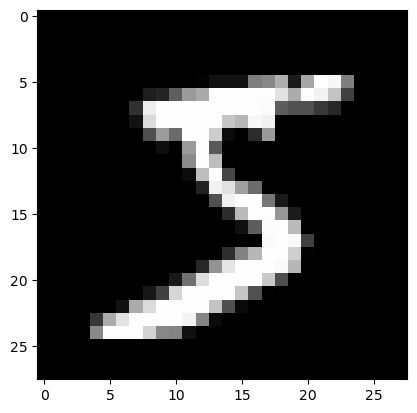

In [ ]:
plt.imshow(imgs[0])

In [ ]:
imgs[0, 20, 15]

tensor(0.9883)

In [ ]:
x_train.shape

torch.Size([50000, 784])

In [ ]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [ ]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [ ]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

## Random Numbers

> Based on the Wichmann Hill Algorithm used before Python 2.3

In [ ]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [ ]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [ ]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [ ]:
rand(),rand(),rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

In [ ]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.9559050644103264
In child: 0.9559050644103264


In [ ]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.0657])
In child: tensor([0.0657])


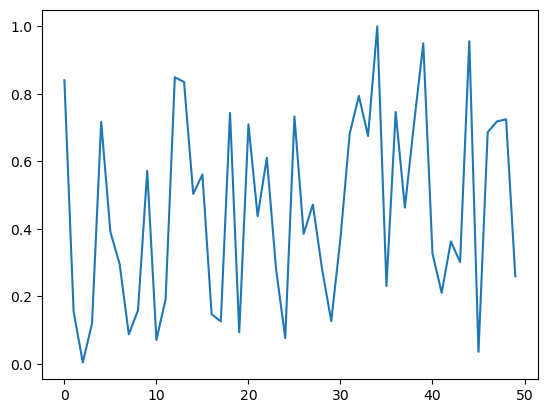

In [ ]:
plt.plot([rand() for _ in range(50)]);

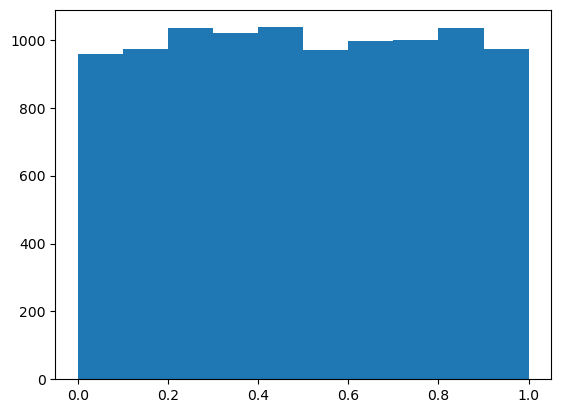

In [ ]:
plt.hist([rand() for _ in range(10000)]);

In [ ]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

2.54 ms ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit -n 10 torch.randn(784,10)

39.9 µs ± 4.94 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matrix Multiplication

In [ ]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [ ]:
m1 = x_valid[:5]
m2 = weights

In [ ]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
ar, ac = m1.shape
br, bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [ ]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [ ]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i,j] += m1[i,k] * m2 [k, j]

In [ ]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [ ]:
t1.shape

torch.Size([5, 10])

In [ ]:
torch.set_printoptions(precision = 2, linewidth = 140, sci_mode = False)

In [ ]:
import numpy as np
np.set_printoptions(precision = 2, linewidth = 140)

In [ ]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    (ar,ac),(br,bc)
    
    t1 = torch.zeros(ar, bc)
    t1.shape
    
    for i in range(ar):  #5
        for j in range(bc):  #10
            for k in range(ac): #784
                t1[i,j] += m1[i,k] * m2 [k, j]
    return t1                

In [ ]:
%timeit -n 1 matmul(m1, m2)

653 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
ar * bc * ac

39200

## Numba

In [ ]:
from numba import njit

In [ ]:
@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [ ]:
from numpy import array

In [ ]:
%time dot(array([1., 2, 3]), array([2., 3, 4]))

CPU times: user 404 ms, sys: 79.7 ms, total: 484 ms
Wall time: 757 ms


20.0

In [ ]:
%timeit -n 50 dot(array([1., 2, 3]), array([2., 3, 4]))

1.24 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape, b.shape
    
    t1 = torch.zeros(ar, bc)
    t1.shape
    
    for i in range(ar):  #5
        for j in range(bc): 
            t1[i,j] = dot(a[i,:], b[:, j])
            #for k in range(ac): #784
            #    t1[i,j] += m1[i,k] * m2 [k, j]

    return t1
                

In [ ]:
m1a, m2a = m1.numpy(), m2.numpy()

In [ ]:
from fastcore.test import *

In [ ]:
test_close(t1, matmul(m1a, m2a))

In [ ]:
%timeit -n 50 matmul(m1a, m2a)

381 µs ± 6.52 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
a = [10 ,6 ,4]
b = [2, 8, 7]
a1 = np.array(a)
b1 = np.array(b)
a1 + b1

array([12, 14, 11])

In [ ]:
a2 = tensor(a)
b2 = tensor(b)

a2 + b2

tensor([12, 14, 11])

In [ ]:
(a2 < b2).float().mean()

tensor(0.67)

In [ ]:
m = tensor([[1,2,3],[4,5,6],[7,8,9]])
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

In [ ]:
sf = (m*m).sum()
sf

tensor(285)

In [ ]:
sf.sqrt()

tensor(16.88)

In [ ]:
m[2, :], m[:,2]

(tensor([7, 8, 9]), tensor([3, 6, 9]))

In [ ]:
m[2]

tensor([7, 8, 9])

In [ ]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape, b.shape
    t1 = torch.zeros(ar, bc)
    
    for i in range(ar):  #5
        for j in range(bc): 
            t1[i,j] = (a[i,:] * b[:, j]).sum()
    return t1
                

In [ ]:
test_close(t1, matmul(m1, m2))

In [ ]:
%timeit -n 50 matmul(m1, m2)

1.02 ms ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape, b.shape
    t1 = torch.zeros(ar, bc)
    
    for i in range(ar):  #5
        for j in range(bc): 
            t1[i,j] = torch.dot(a[i,:], b[:, j])
    return t1
                

In [ ]:
test_close(t1, matmul(m1, m2))

In [ ]:
%timeit -n 50 matmul(m1, m2)

793 µs ± 8.07 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Broadcasting with a scalar

In [ ]:
a2

tensor([10,  6,  4])

In [ ]:
a2 > 0

tensor([True, True, True])

In [ ]:
a2 + 1

tensor([11,  7,  5])

In [ ]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
a2

tensor([10,  6,  4])

## Broadcasting a vector to a matrix


In [ ]:
c = tensor([10.,20, 30]);c

tensor([10., 20., 30.])

In [ ]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [ ]:
c+ m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
t  = c.expand_as(m)

In [ ]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [ ]:
t.untyped_storage()

 0
 0
 32
 65
 0
 0
 160
 65
 0
 0
 240
 65
[torch.storage.UntypedStorage(device=cpu) of size 12]

In [ ]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [ ]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [ ]:
m[:,:, None]

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])

In [ ]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [ ]:
c.unsqueeze(1), c[: ,None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [ ]:
c.shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([3, 1]))

In [ ]:
c[None].shape, c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [ ]:
c[: ,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [ ]:
m + c[:, None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [ ]:
m + c[None, :]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
c[None, :] * c[:, None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [ ]:
c[None, :] > c[:, None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [ ]:
c

tensor([10., 20., 30.])

In [ ]:
m * m

tensor([[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]])

## Matmul with broadcasting

In [ ]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [ ]:
digit[:,None].shape

torch.Size([784, 1])

In [ ]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [ ]:
(digit[:,None]* m2).shape

torch.Size([784, 10])

In [ ]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape, b.shape
    t1 = torch.zeros(ar, bc)
    
    for i in range(ar):  #5
        for j in range(bc):  #10
            # t1[i,j] = (a[i,:] * b[:, j]).sum()
            # t1[i,j] = torch.dot(a[i,:], b[:, j])
            t1[i] = (a[i, :, None] * b).sum(dim = 0)
    return t1

In [ ]:
test_close(t1, matmul(m1, m2))

In [ ]:
%timeit -n 50 _=matmul(m1, m2)

1.34 ms ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
result=matmul(m1, m2)
result

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [ ]:
tr = matmul(x_train, weights)
tr.shape,tr

(torch.Size([50000, 10]),
 tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
         [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
         [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
         ...,
         [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
         [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
         [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]]))

In [ ]:
%time result=matmul(x_train, weights)

CPU times: user 14 s, sys: 8.28 ms, total: 14 s
Wall time: 13.1 s


In [ ]:
%timeit -n 50 np.matmul(m1,m2)

26.3 µs ± 6.27 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
%timeit -n 5 _=np.matmul(x_train, weights)

50.7 ms ± 5.95 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [ ]:
%timeit -n 50 torch.matmul(m1,m2)

The slowest run took 6.67 times longer than the fastest. This could mean that an intermediate result is being cached.
8.14 µs ± 8.83 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
%timeit -n 5 _=torch.matmul(x_train, weights)

13.3 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


## Einstein Summation

> `einsum` is a compact representation for combining products and sums in a general way. 

In [ ]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
mr = torch.einsum('ik,kj->ikj',m1,m2)
mr.shape

torch.Size([5, 784, 10])

In [ ]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [ ]:
mr = torch.einsum('ik,kj->ij',m1,m2)

In [ ]:
def matmul(a, b): return torch.einsum('ik,kj->ij',a,b)

In [ ]:
test_close(tr, matmul(x_train, weights), eps=1e-3)

In [ ]:
%timeit -n 5 _=matmul(x_train, weights)

11.3 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## pytorch op

In [ ]:
test_close(tr, x_train@weights, eps=1e-3)

In [ ]:
%timeit -n 5 _=torch.matmul(x_train, weights)

12.5 ms ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


## CUDA

In [ ]:
!conda list | grep cudatoolkit

cudatoolkit               11.8.0              h4ba93d1_12    conda-forge


In [ ]:
def matmul(grid, a, b, c):
    i, j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]):
            tmp += a[i, k] * b[k, j]
            c[i, j] = tmp

In [ ]:
res = torch.zeros(ar,bc)
matmul((0,0), m1, m2, res)
res

tensor([[-10.94,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]])

In [ ]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y): 
            kernel((i, j), *args, **kwargs)

In [ ]:
res = torch.zeros(ar, bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [ ]:
from numba import cuda

In [ ]:
@cuda.jit
def matmul(a,b,c):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]):
            tmp += a[i, k] * b[k, j]
            c[i, j] = tmp

In [ ]:
r = np.zeros(tr.shape)
#m1g, m2g, rg = cuda.to_device(x_train), cuda.to_device(weights), cuda.to_device(r)

In [ ]:
m1g, m2g, rg = map(cuda.to_device, (x_train, weights, r))

In [ ]:
m1g, m1g.shape

(<numba.cuda.cudadrv.devicearray.DeviceNDArray>,
 (50000, 784))

In [ ]:
TPB = 16
rr, rc = r.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
blockspergrid

(3125, 1)

In [ ]:
matmul[blockspergrid, (TPB, TPB)](m1g, m2g, rg)

In [ ]:
r = rg.copy_to_host()
test_close(tr, r, eps=1e-3)

In [ ]:
%timeit -n 10 
matmul[blockspergrid, (TPB, TPB)](m1g, m2g, rg)
r = rg.copy_to_host()

In [ ]:
m1c, m2c = x_train.cuda(), weights.cuda()
m1gpu, m2gpu = m1.cuda(), m2.cuda()


`cpu()` copys from GPU to CPU

In [ ]:
r = (m1c @ m2c).cpu()

In [ ]:
%timeit -n 50 a = (m1gpu@m2gpu).cpu()

The slowest run took 7.32 times longer than the fastest. This could mean that an intermediate result is being cached.
126 µs ± 113 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
%timeit -n 50 r = (m1c@m2c).cpu()

1.24 ms ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
r, r.shape

(tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
         [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
         [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
         ...,
         [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
         [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
         [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]]),
 torch.Size([50000, 10]))

In [ ]:
import gc
import torch
torch.cuda.empty_cache()
gc.collect()

90

In [ ]:
import ctypes
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)

1

In [ ]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

## Clustering 

> Clustering techniques are unsupervised learning algorithms that try to group unlabelled data into "clusters", using the (typically spatial) structure of the data itself.

In [ ]:
import math, matplotlib.pyplot as plt, operator, torch
from functools import partial

In [ ]:
torch.manual_seed(42)
torch.set_printoptions(precision = 3, linewidth = 140, sci_mode = False)

## Create data


In [ ]:
n_clusters= 6
n_samples = 250
centroids = torch.rand(n_clusters, 2) * 70 - 35
centroids

tensor([[ 26.759,  29.050],
        [ -8.200,  32.151],
        [ -7.669,   7.063],
        [-17.040,  20.555],
        [ 30.854, -25.677],
        [ 30.422,   6.551]])

In [ ]:
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

In [ ]:
def sample(m):
    return MultivariateNormal(m,
                              torch.diag(tensor([5.,5.]))).sample((n_samples,))

In [ ]:
slices = [sample(c) for c in centroids]
data = torch.cat(slices)
data.shape

torch.Size([1500, 2])

In [ ]:
def plot_data(centroids, data, n_samples, ax = None):
    if ax is None: _,ax = plt.subplots()
    for i, centroid in enumerate(centroids):
        samples = data[i * n_samples:(i + 1) * n_samples]
        ax.scatter(samples[:,0], samples[:,1], s = 1)
        ax.plot(*centroid, markersize=10, marker = "x", color='k', mew = 5)
        ax.plot(*centroid, markersize=5, marker= "x", color = 'm', mew = 2)

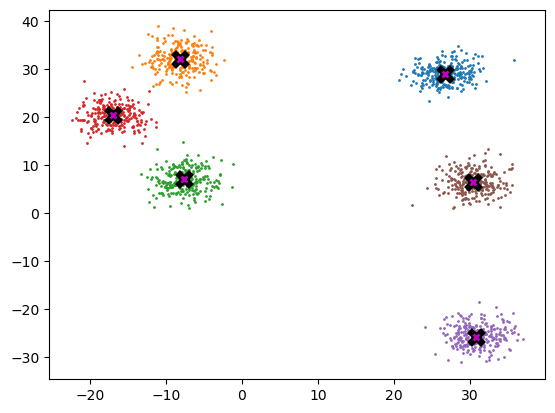

In [ ]:
plot_data(centroids, data, n_samples)

## Mean shift

In [ ]:
midp = data.mean(0)
midp 

tensor([ 9.222, 11.604])

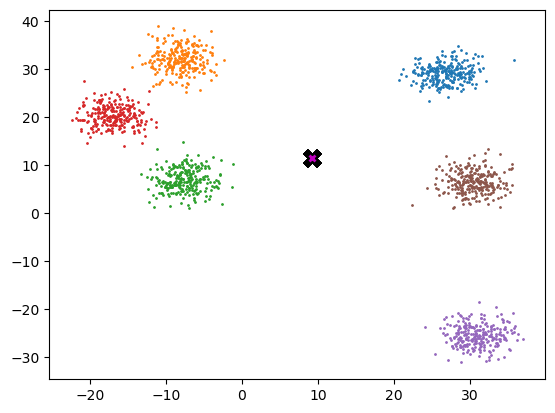

In [ ]:
plot_data([midp]*6, data, n_samples)

In [ ]:
def gaussian(d, bw):
    return torch.exp(-0.5*((d/bw))**2) / (bw * math.sqrt(2*math.pi))

In [ ]:
def plot_func(f):
    x = torch.linspace(0, 10, 100)
    plt.plot(x, f(x))
    

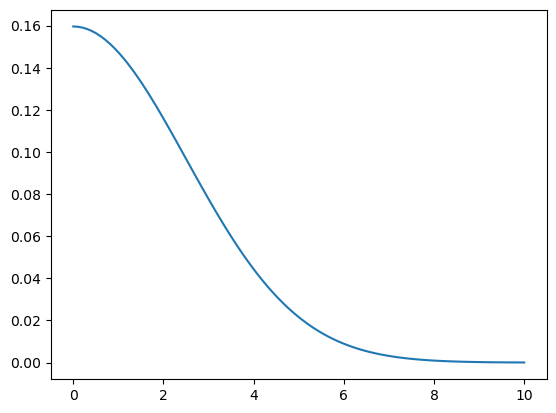

In [ ]:
plot_func(partial(gaussian, bw=2.5))

In [ ]:
f = partial(gaussian, bw=2.5)

In [ ]:
f(tensor(4.))

tensor(0.044)

In [ ]:
def tri(d, i): return (-d + i).clamp_min(0)/i

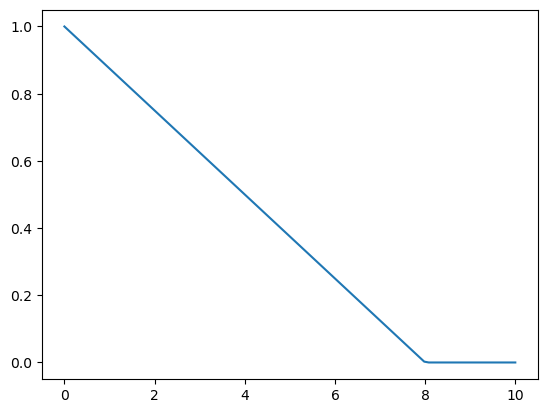

In [ ]:
plot_func(partial(tri, i = 8))

In [ ]:
X = data.clone()
x = data[0]
x

tensor([26.204, 26.349])

In [ ]:
x.shape, X.shape, x[None].shape

(torch.Size([2]), torch.Size([1500, 2]), torch.Size([1, 2]))

In [ ]:
(x- X)[:8]

tensor([[ 0.000,  0.000],
        [ 0.513, -3.865],
        [-4.227, -2.345],
        [ 0.557, -3.685],
        [-5.033, -3.745],
        [-4.073, -0.638],
        [-3.415, -5.601],
        [-1.920, -5.686]])

In [ ]:
dist = torch.einsum('ik->i',((x - X) ** 2))
dist.sqrt()

tensor([ 0.000,  3.899,  4.834,  ..., 17.628, 22.610, 21.617])

In [ ]:
dist = ((x - X) ** 2).sum(1).sqrt()
dist

tensor([ 0.000,  3.899,  4.834,  ..., 17.628, 22.610, 21.617])

In [ ]:
weight = gaussian(dist, 2.5)
weight[:8]

tensor([0.160, 0.047, 0.025, 0.053, 0.007, 0.041, 0.005, 0.009])

In [ ]:
weight.shape,weight[:,None].shape, X.shape

(torch.Size([1500]), torch.Size([1500, 1]), torch.Size([1500, 2]))

In [ ]:
weight[:,None] * X

tensor([[    4.182,     4.205],
        [    1.215,     1.429],
        [    0.749,     0.706],
        ...,
        [    0.000,     0.000],
        [    0.000,     0.000],
        [    0.000,     0.000]])

In [ ]:
def one_update(X):
    for i, x in enumerate(X):
        dist = torch.einsum('ik->i',((x - X) ** 2))
        weight = gaussian(dist, 2.5)

        X[i] = (weight[:, None] * X).sum(0)/weight.sum()
    

In [ ]:
def meanshift(data):
    X = data.clone()
    for it in range(5): one_update(X)
    return X
    

In [ ]:
%time X = meanshift(data)

CPU times: user 867 ms, sys: 144 µs, total: 867 ms
Wall time: 866 ms


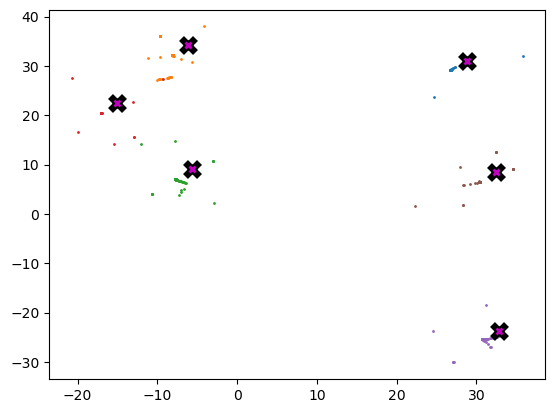

In [ ]:
plot_data(centroids+2, X, n_samples)

## Animation

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
def do_one(d):
    if d: one_update(X)
    ax.clear()
    plot_data(centroids+2, X, n_samples, ax = ax)

In [ ]:
X = data.clone()
fig, ax = plt.subplots()
ani = FuncAnimation(fig, do_one, frames = 5, interval=500, repeat=False)
plt.close()
HTML(ani.to_jshtml())


## GPU batched algorithm

In [ ]:
bs = 5
X = data.clone()
x = X[:bs]
x.shape, X.shape

(torch.Size([5, 2]), torch.Size([1500, 2]))

In [ ]:
def dist_b(a, b):
    return (((a[None] -b[:,None])**2).sum(2)).sqrt()

In [ ]:
dist_b(X,x)

tensor([[ 0.000,  3.899,  4.834,  ..., 17.628, 22.610, 21.617],
        [ 3.899,  0.000,  4.978,  ..., 21.499, 26.508, 25.500],
        [ 4.834,  4.978,  0.000,  ..., 19.373, 24.757, 23.396],
        [ 3.726,  0.185,  4.969,  ..., 21.335, 26.336, 25.333],
        [ 6.273,  5.547,  1.615,  ..., 20.775, 26.201, 24.785]])

In [ ]:
dist_b(X,x).shape

torch.Size([5, 1500])

In [ ]:
X[None,:].shape, x[:,None].shape, (X[None, :] - x[:, None]).shape

(torch.Size([1, 1500, 2]), torch.Size([5, 1, 2]), torch.Size([5, 1500, 2]))

In [ ]:
gaussian??

Signature: gaussian(d, bw)
Docstring: <no docstring>
Source:   
def gaussian(d, bw):
    return torch.exp(-0.5*((d/bw))**2) / (bw * math.sqrt(2*math.pi))
File:      /tmp/ipykernel_1054164/117635507.py
Type:      function

In [ ]:
weight = gaussian(dist_b(X,x),2)

In [ ]:
weight.shape, X.shape

(torch.Size([5, 1500]), torch.Size([1500, 2]))

In [ ]:
weight[..., None].shape, x[None].shape

(torch.Size([5, 1500, 1]), torch.Size([1, 5, 2]))

In [ ]:
num = (weight[...,None] * X[None]).sum(1)
num.shape

torch.Size([5, 2])

In [ ]:
num

tensor([[367.870, 386.231],
        [518.332, 588.680],
        [329.665, 330.782],
        [527.617, 598.217],
        [231.302, 234.155]])

In [ ]:
torch.einsum('ij,jk ->ik', weight, X)

tensor([[367.870, 386.231],
        [518.332, 588.680],
        [329.665, 330.782],
        [527.617, 598.217],
        [231.302, 234.155]])

In [ ]:
weight@X

tensor([[367.870, 386.231],
        [518.332, 588.680],
        [329.665, 330.782],
        [527.617, 598.217],
        [231.302, 234.155]])

In [ ]:
div = weight.sum(1, keepdim = True)
div.shape

torch.Size([5, 1])

In [ ]:
num/div

tensor([[26.376, 27.692],
        [26.101, 29.643],
        [28.892, 28.990],
        [26.071, 29.559],
        [29.323, 29.685]])

In [ ]:
bs = 5

In [ ]:
def meanshift(data, bs = 500):
    n = len(data)
    X = data.clone()
    for it in range(5):
        for i in range(0, n, bs):
            s = slice(i, min(i+bs, n))
            weight = gaussian(dist_b(X, X[s]), 2.5)
            div = weight.sum(1, keepdim = True)
            X[s] = weight@X/div

    return X

In [ ]:
data = data.cuda()

In [ ]:
X = meanshift(data,bs).cpu()

In [ ]:
%timeit -n 5 _=meanshift(data,64).cpu()

17.7 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [ ]:
%timeit -n 5 _=meanshift(data,1024).cpu()

3.91 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [ ]:
%timeit -n 5 _=meanshift(data, 1500).cpu()

3.68 ms ± 8.66 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


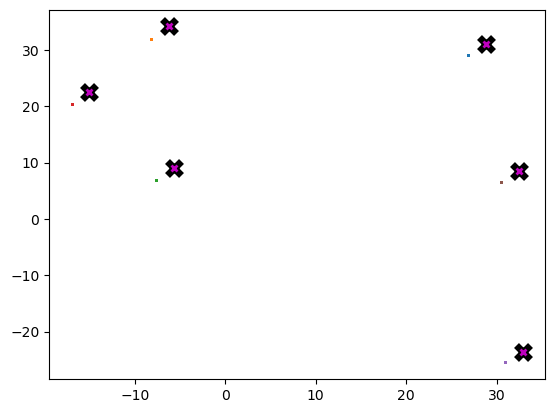

In [ ]:
plot_data(centroids+2, X, n_samples)